In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Data Science\Practical\Machine Learning\Dataset\brest cancer.txt",header=None)
df.head()  # view top 5 rows of dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

# Exploratory data analysis

In [6]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Rename column names
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. 
We should give proper names to the columns. I will do it as follows:-

In [8]:
col_Names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [9]:
df.columns = col_Names

In [10]:
df
# We can see that the column names are renamed. Now, the columns have meaningful names.

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. 
Here, Id is the redundant column. So, I will drop it first.

In [11]:
df.drop(['Id'],axis=1,inplace=True)

In [12]:
df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# Frequency distribution of values in variables

In [13]:
for var in df.columns:
    print(df[var].value_counts())


1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

# Convert data type of Bare_Nuclei to integer

In [14]:
df["Bare_Nuclei"] = pd.to_numeric(df["Bare_Nuclei"],errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


# Summary of variables
There are 10 numerical variables in the dataset.

All of the variables are of discrete type.

Out of all the 10 variables, the first 9 variables are feature variables and last variable Class is the target variable.

# Explore problems within variables
Now, I will explore problems within variables.

# Missing values in variables

In [16]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [17]:
# check `na` values in the dataframe

In [18]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [19]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [20]:
# check unique values in `Bare_Nuclei` column
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [21]:
#We can see that there are nan values in the Bare_Nuclei column.

In [22]:
df['Bare_Nuclei'].isna().sum()
   

16

# We can see that there are 16 nan values in the dataset. 
I will impute missing values after dividing the dataset into training and test set.

check frequency distribution of target variable Class

In [23]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# check percentage of frequency distribution of Class

In [24]:
df['Class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

# Outliers in numerical variables

In [25]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

In [26]:
#kNN algorithm is robust to outliers.

# Data Visualization

# Univariate plots
Check the distribution of variables
Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

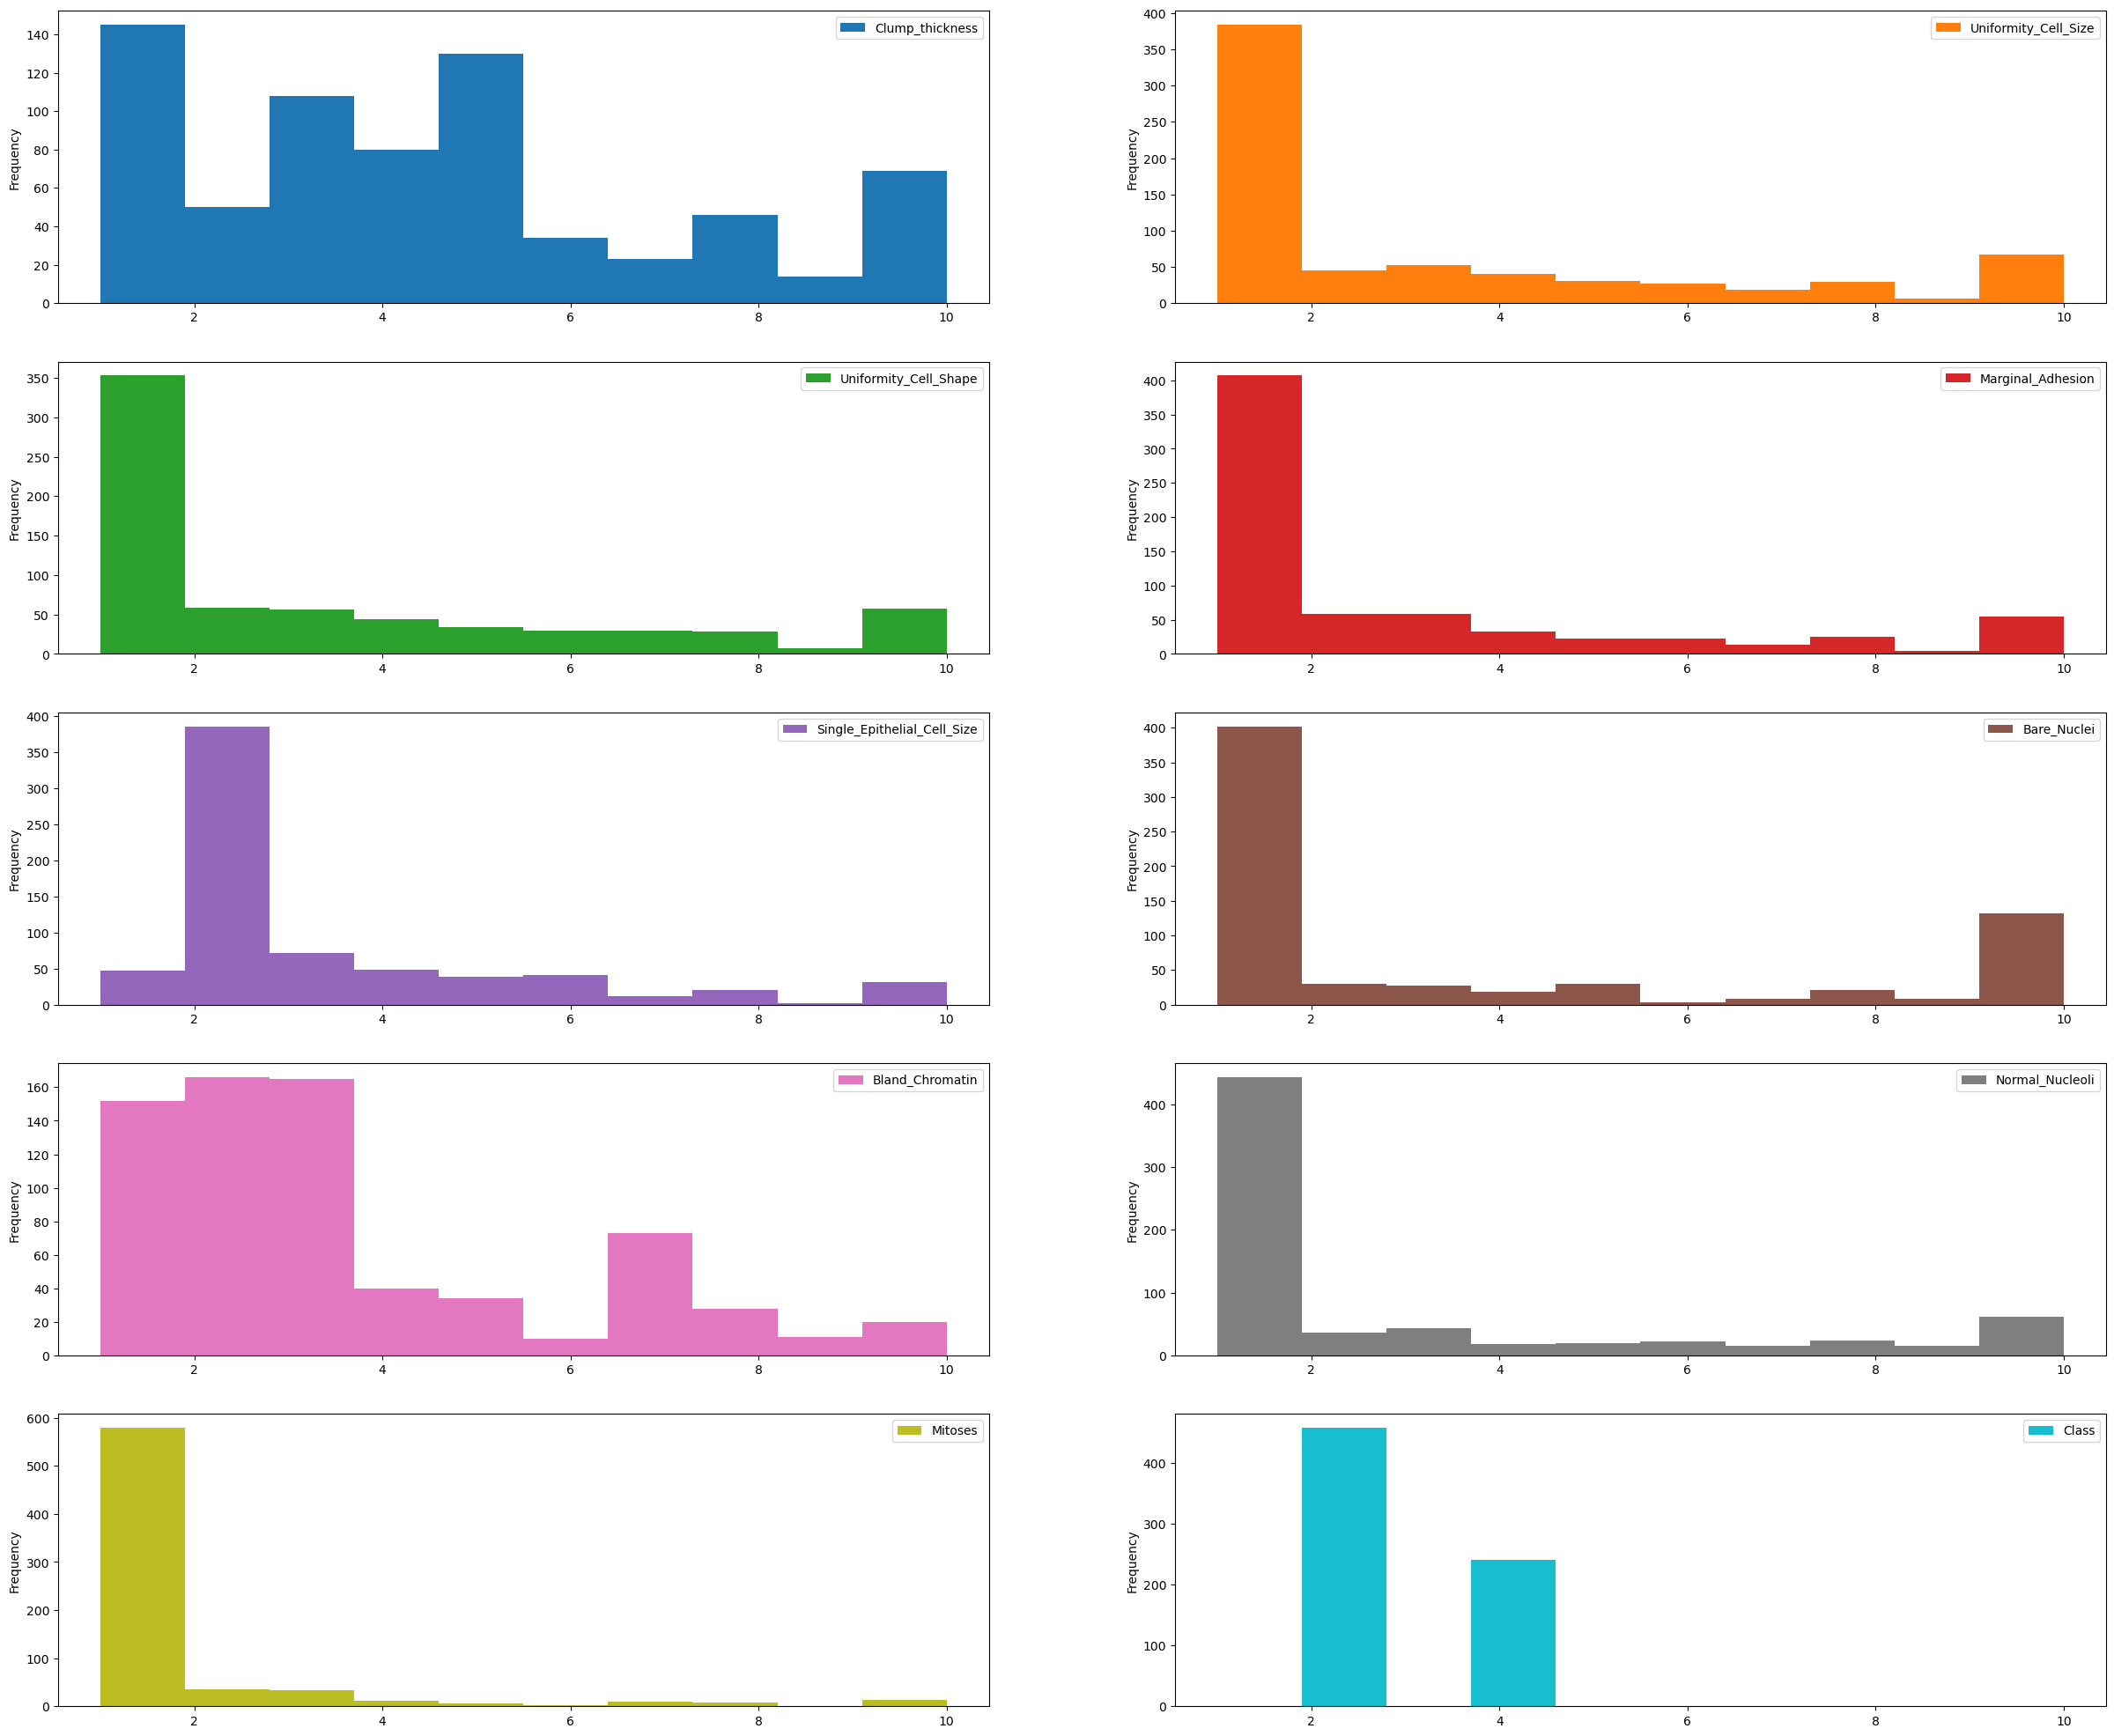

In [27]:
# plot histograms of the variables
plt.rcParams['figure.figsize'] = (30,25)
df.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)
plt.show()

In [28]:
#We can see that all the variables in the dataset are positively skewed.

# Multivariate plots

# Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r)
between every pair of attributes.
We can compute it using the df.corr() method as follows:-

In [29]:
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [30]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

# Interpretation
The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei,
Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, 
it means that there is no correlation.

We can see that all the variables are positively correlated with Class variable. 
Some variables are strongly positive correlated while some variables are negatively correlated.

# Discover patterns and relationships
An important step in EDA is to discover patterns and relationships between variables in the dataset. 
I will use the seaborn heatmap to explore the patterns and relationships in the dataset.

# Correlation Heat Map

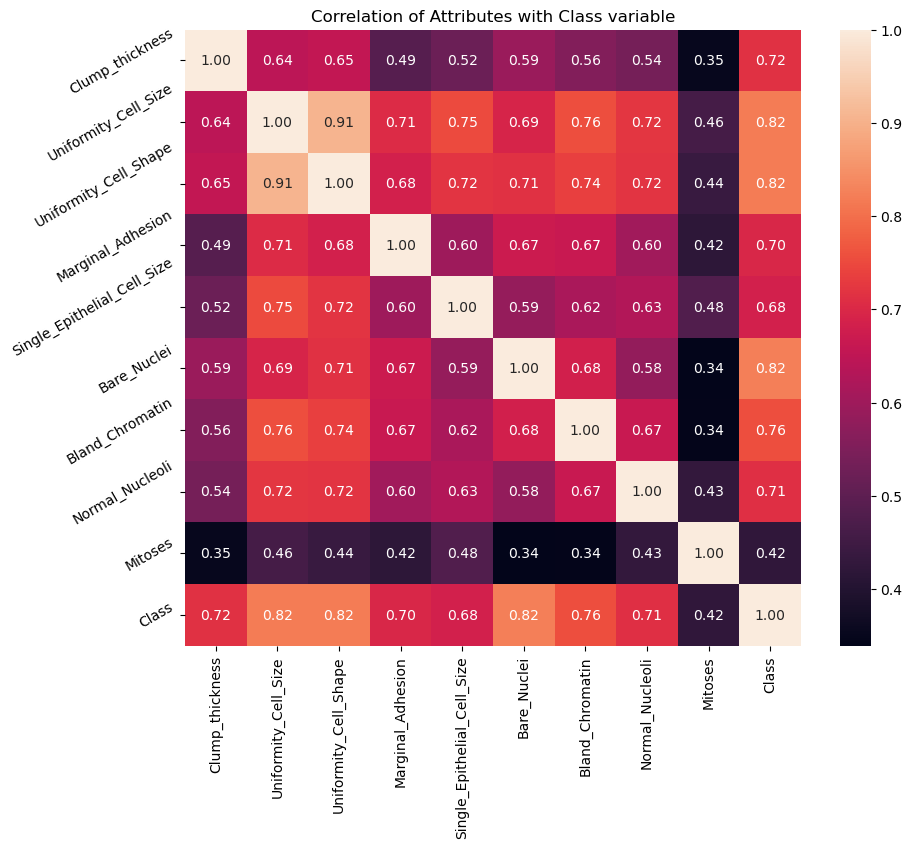

In [31]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

# Interpretation
From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei.
(correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion

(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and 
Normal_Nucleoli(correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

# 9. Declare feature vector(independant variable) and target variable

In [32]:
x = df.drop(['Class'],axis=1)
y = df['Class']

# 10. Split data into separate training and test set 

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.20,random_state=0)

In [34]:
# check the shape of X_train and X_test
train_x.shape

(559, 9)

In [35]:
test_x.shape

(140, 9)

# 11. Feature Engineering 

In [36]:
train_x.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [37]:
test_x.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [38]:
train_x.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [39]:
test_x.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [40]:
# print percentage of missing values in the numerical variables in training set

for col in train_x.columns:
    if train_x[col].isnull().mean() >0:
        print(col,round(train_x[col].isnull().mean(),4))

Bare_Nuclei 0.0233


# Assumption
I assume that the data are missing completely at random (MCAR). 
There are two methods which can be used to impute missing values. 
One is mean or median imputation and other one is random sample imputation.
When there are outliers in the dataset, we should use median imputation. 
So, I will use median imputation because median imputation is robust to outliers.
I will impute missing values with the appropriate statistical measures of the data, in this case median. 
Imputation should be done over the training set, and then propagated to the test set. 
It means that the statistical measures to be used to fill missing values both in train and test set,
should be extracted from the train set only. This is to avoid overfitting.

In [41]:
# impute missing values in X_train and X_test with respective column median in X_train

In [42]:
for df1 in [train_x,test_x]:
    for col in train_x.columns:
        col_median = train_x[col].median()
        df1[col].fillna(col_median,inplace=True)

In [43]:
train_x.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [44]:
test_x.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [45]:
#We can see that there are no missing values in X_train and X_test.

# 12. Feature Scaling

In [46]:
cols = train_x.columns

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [48]:
train_x = pd.DataFrame(train_x,columns=[cols])
test_x = pd.DataFrame(test_x,columns=[cols])

In [49]:
train_x.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


# 13. Fit K Neighbours Classifier to the training eet 

In [50]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(train_x,train_y)


KNeighborsClassifier(n_neighbors=3)

# 14. Predict test-set results

In [51]:
y_pred = knn.predict(test_x)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

# predict_proba method
predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

In [52]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(test_x)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 1.     

In [53]:
knn.predict_proba(test_x)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 0.     

# 15. Check accuracy score

In [54]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y,y_pred)
acc

0.9642857142857143

# Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [55]:
y_pred_train = knn.predict(train_x)
acc_train = accuracy_score(train_y,y_pred_train)
acc_train

0.9821109123434705

# Check for overfitting and underfitting

In [56]:
bias = knn.score(train_x,train_y)
bias

0.9821109123434705

In [57]:
variance = knn.score(test_x,test_y)
variance

0.9642857142857143

In [58]:
# no overfitting

# Compare model accuracy with null accuracy

In [60]:
# check class distribution in test set
test_y.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [61]:
# check null accuracy score

null_accuracy = (85/(85+55))
null_accuracy

0.6071428571428571

# 16. Rebuild kNN Classification model using different values of k

In [62]:
### Rebuild kNN Classification model using k=5

In [63]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(train_x, train_y)


# predict on the test-set
y_pred_5 = knn_5.predict(test_x)

acc = accuracy_score(test_y,y_pred_5)
acc

0.9642857142857143

In [64]:
#Rebuild kNN Classification model using k=6

In [65]:
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(train_x, train_y)


# predict on the test-set
y_pred_6 = knn_6.predict(test_x)

acc = accuracy_score(test_y,y_pred_6)
acc

0.9642857142857143

In [66]:
#Rebuild kNN Classification model using k=7

In [67]:
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(train_x, train_y)


# predict on the test-set
y_pred_7 = knn_7.predict(test_x)

acc = accuracy_score(test_y,y_pred_7)
acc

0.9714285714285714

In [68]:
#Rebuild kNN Classification model using k=8

In [69]:
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(train_x, train_y)


# predict on the test-set
y_pred_8 = knn_8.predict(test_x)

acc = accuracy_score(test_y,y_pred_8)
acc

0.9714285714285714

In [70]:
#Rebuild kNN Classification model using k=9

In [71]:
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(train_x, train_y)


# predict on the test-set
y_pred_9 = knn_9.predict(test_x)

acc = accuracy_score(test_y,y_pred_9)
acc

0.9714285714285714

# Interpretation
Our original model accuracy score with k=3 is 0.9642. Now, we can see that we get same accuracy score of 0.9642 with k=5,6
But, if we increase the value of k further, this would result in enhanced accuracy.

With k=7,8 we get accuracy score of 0.9714. So, it results in performance improvement.

Now, based on the above analysis we can conclude that our classification model accuracy is very good.
Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type 
of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# 17. Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [72]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[83  2]
 [ 3 52]]

True Positives(TP) =  83

True Negatives(TN) =  52

False Positives(FP) =  2

False Negatives(FN) =  3


In [73]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(test_y, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


<Axes: >

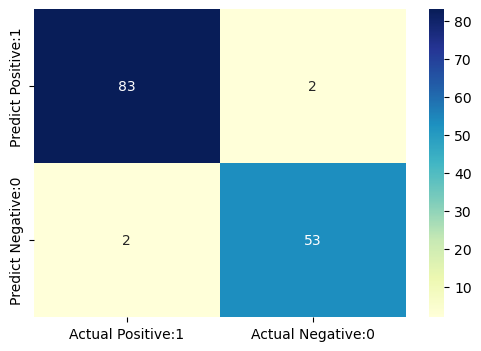

In [74]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 18. Classification metrices

# Classification Report
Classification report is another way to evaluate the classification model performance.
It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [76]:
from sklearn.metrics import classification_report
cr = classification_report(test_y,y_pred_7)
print(cr)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



# Classification accuracy

In [78]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [79]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9714


# Classification error

In [80]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0286


# Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the 
predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and 
false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with 
the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [81]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9765


# Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). 
Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [82]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9765


# True Positive Rate
True Positive Rate is synonymous with Recall

In [83]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9765


# False Positive Rate

In [84]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0364


# Specificity

In [85]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9636


# f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.


# Support
Support is the actual number of occurrences of the class in our dataset.

In [86]:
y_pred_prob = knn.predict_proba(test_x)[0:10]
print(y_pred_prob)

[[1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]]


# Observations
In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - 2 and 4.

Class 2 - predicted probability that there is benign cancer.

Class 4 - predicted probability that there is malignant cancer.

Importance of predicted probabilities

We can rank the observations by probability of benign or malignant cancer.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 4 - probability of malignant cancer is predicted if probability > 0.5.

Class 2 - probability of benign cancer is predicted if probability < 0.5.

In [87]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.333333,0.666667
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [89]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(test_x)[0:10, 1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333])

In [91]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(test_x)[:, 1]

Text(0, 0.5, 'Frequency')

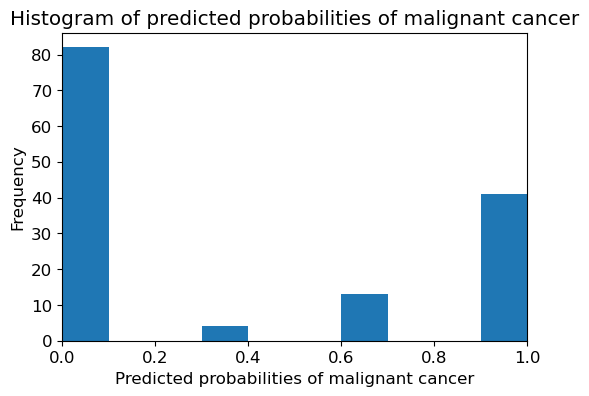

In [92]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

# Observations
We can see that the above histogram is positively skewed.

The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.

There are few observations with probability > 0.5.

So, these few observations predict that there will be malignant cancer.

# Comments
In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.

Threshold can be adjusted to increase sensitivity or specificity.

Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.

Adjusting the threshold level should be one of the last step you do in the model-building process.

# 19. ROC-AUC 

# ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver
Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at 
various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. 
This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels.
So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels,
it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

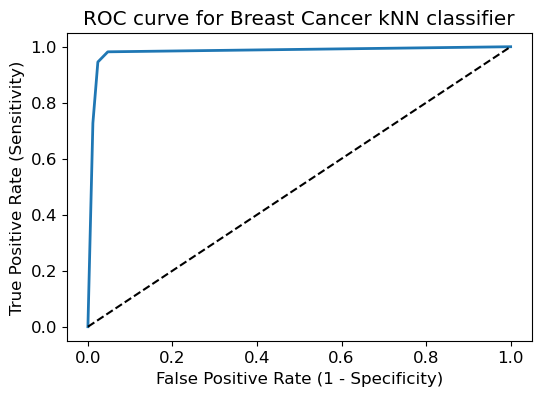

In [93]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [ ]:
#ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

# ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance.
In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [95]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(test_y, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9811


# Interpretation
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting 
whether it is benign or malignant cancer.

In [96]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, train_x, train_y, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


# Interpretation
Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

# 20. k-fold Cross Validation 


In this section, I will apply k-fold Cross Validation technique to improve the model performance. 
Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough 
than using a train-test split to evaluate model performance.

In [98]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, train_x, train_y, cv = 10, scoring='accuracy').mean()

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:0.9642532467532468


# Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

# 21. Results and Conclusion 

In [ ]:
1.In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. 
The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

2. With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. 
These two values are quite comparable. So, there is no question of overfitting.

3.I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071.
So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

4.Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. 
But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 
we get accuracy score of 0.9786.
So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So,
we can conclude that our optimal value of k is 7.

5. kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model.
Hence, we got performance improvement with k=7.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in
predicting whether it is benign or malignant cancer.

7. Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

8. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that
there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy.
So, we can conclude that the model is very dependent on the particular folds used for training, 
but it also be the consequence of the small size of the dataset.